<a href="https://colab.research.google.com/github/RoopamSeal/Thalassemia_ML/blob/main/Thalassemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

In [ ]:
# importing the dataset
df = pd.read_excel('thal_data.xlsx')
df.head(10)

,name,age,sex,trait,HbA,HbA2,HbF,Hemoglobin,RBC,MCV,MCH,MCHC,RDW
0,basanti,26.0,F,HbE homozygous,6.5,93.2,13.5,8.38,3.82,76.8,21.9,28.6,18.7
1,Rubina,18.0,F,HbE Trait,67.7,28.3,0.8,9.61,3.81,83.1,25.2,30.1,15.3
2,Madhumita,19.0,F,Beta Thal Trait,90.5,3.9,0.8,9.36,3.62,83.8,25.9,30.9,15.9
3,Jinnataun,30.0,F,HbE homozygous,13.0,92.0,1.7,10.10,4.38,63.8,22.9,35.9,20.5
4,Rina,42.0,F,HbE Trait,65.1,30.2,0.8,12.90,3.96,90.0,32.7,36.4,15.0
5,Mina,23.0,F,Beta Thal Trait,88.6,5.5,0.9,7.63,3.61,71.7,21.1,29.5,19.7
6,keya,23.0,F,Beta Thal Trait,88.1,5.4,1.6,9.64,5.11,65.6,18.9,28.8,18.5
7,namita,19.0,F,Beta Thal Trait,89.1,5.5,0.8,10.42,5.27,67.4,19.8,29.4,19.6
8,sukamal,46.0,M,HbE Trait,73.9,27.2,0.8,18.02,6.72,94.6,26.8,28.3,16.2
9,pabitra,20.0,F,HbE Trait,73.3,26.7,2.5,9.36,3.73,86.0,25.1,29.2,16.4


In [ ]:
del df['name']   # dropping the name column

In [ ]:
df.shape   # defining the rows and columns of the dataset

(202, 12)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.describe()

,age,HbA,HbA2,HbF,Hemoglobin,RBC,MCV,MCH,MCHC,RDW
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,26.504950,68.223762,23.766832,1.809406,10.301980,4.545792,73.819802,22.082673,29.832178,17.552475
std,11.439652,22.713926,24.303908,3.707993,5.202158,0.907743,8.059246,2.957518,1.946959,3.597431
min,1.500000,2.600000,3.900000,0.100000,5.320000,2.500000,56.400000,16.600000,19.400000,10.300000
25%,20.250000,63.000000,5.300000,0.600000,8.950000,3.907500,67.325000,19.700000,28.800000,15.300000
50%,25.000000,73.400000,25.250000,0.800000,9.905000,4.445000,73.500000,22.350000,29.700000,17.300000
75%,30.000000,83.800000,28.600000,1.775000,11.100000,5.107500,79.300000,24.100000,30.800000,19.575000
max,82.000000,93.000000,114.800000,44.600000,79.300000,7.180000,102.900000,32.700000,36.400000,42.500000


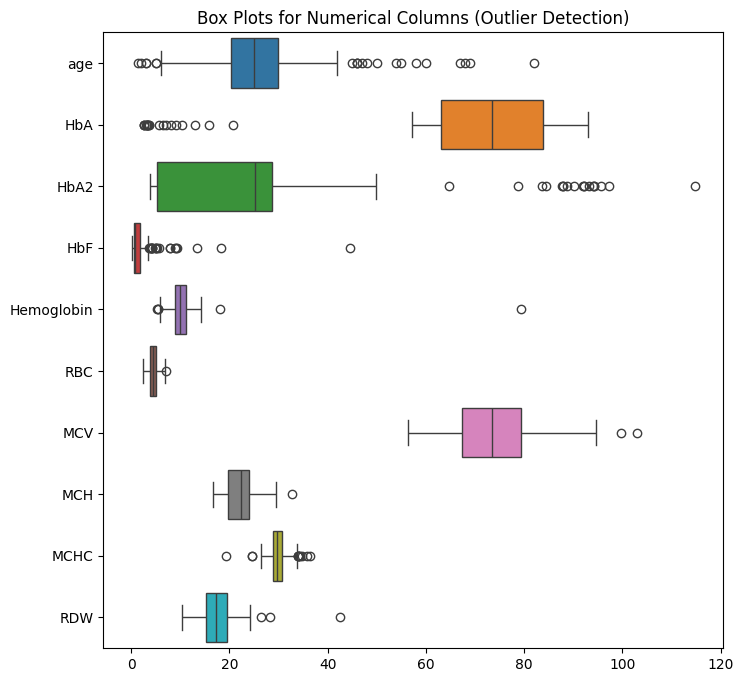

In [ ]:
numeric_columns = df.select_dtypes(include='number')

plt.figure(figsize=(8, 8))

sns.boxplot(data=numeric_columns, orient='h')

plt.title('Box Plots for Numerical Columns (Outlier Detection)')
plt.show()

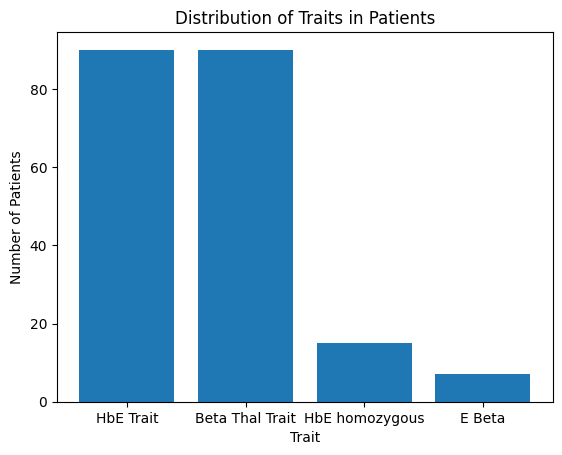

In [ ]:
n_patients_per_trait = df['trait'].value_counts().sort_values(ascending=False)

trait_names = n_patients_per_trait.index.to_numpy()

n_patients = n_patients_per_trait.to_numpy()

plt.bar(trait_names, n_patients)
plt.xlabel('Trait')
plt.ylabel('Number of Patients')
plt.title('Distribution of Traits in Patients')
plt.show()

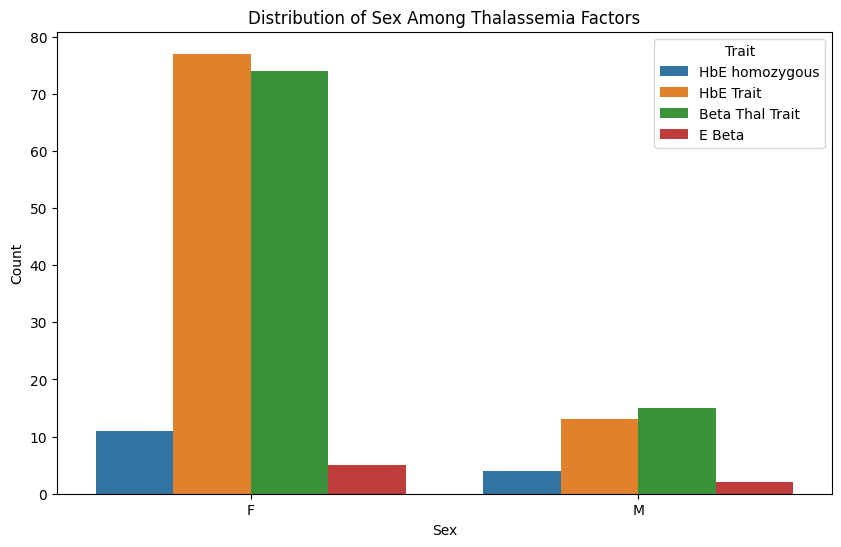

In [ ]:
# creating a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['sex'].isin(['M', 'F'])], x='sex', hue='trait')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex Among Thalassemia Factors')

plt.legend(title='Trait', loc='upper right')

plt.show()


In [ ]:
# calculating the mean of the numerical values of the dataset
df_mean = df.groupby('trait').mean(numeric_only=True)
print(df_mean)

                       age        HbA       HbA2        HbF  Hemoglobin  \
trait                                                                     
Beta Thal Trait  25.855556  84.358889   5.466667   1.337778   10.420222   
E Beta           20.000000  27.314286  59.914286  14.228571    7.627143   
HbE Trait        27.400000  65.494444  27.775556   0.952222   10.556556   
HbE homozygous   28.066667   6.880000  92.646667   3.986667    9.313333   

                      RBC        MCV        MCH       MCHC        RDW  
trait                                                                  
Beta Thal Trait  4.814667  68.524444  20.145556  29.293333  18.243333  
E Beta           3.781429  70.357143  20.500000  29.171429  20.357143  
HbE Trait        4.344667  80.272222  24.346667  30.311111  16.490000  
HbE homozygous   4.496000  68.493333  20.860000  30.500000  18.473333  


In [ ]:
# calculating the standard deviation of the numerical values of the dataset
df_std = df.groupby('trait').std(numeric_only=True)
print(df_std)

                       age        HbA       HbA2        HbF  Hemoglobin  \
trait                                                                     
Beta Thal Trait  11.035501   2.974608   2.293224   1.416958    7.539013   
E Beta           11.075498  37.624036  29.555452  14.118158    1.113085   
HbE Trait        12.048404   4.405037   2.254599   0.589654    1.706806   
HbE homozygous    9.881199   5.544135   6.893047   2.941299    1.743153   

                      RBC       MCV       MCH      MCHC       RDW  
trait                                                              
Beta Thal Trait  0.988458  5.178397  2.105112  2.039652  3.258250  
E Beta           0.831132  8.092766  2.613427  1.578728  3.001587  
HbE Trait        0.735475  5.929341  2.209947  1.646272  3.760201  
HbE homozygous   0.929860  5.116425  1.872660  2.375169  3.066284  


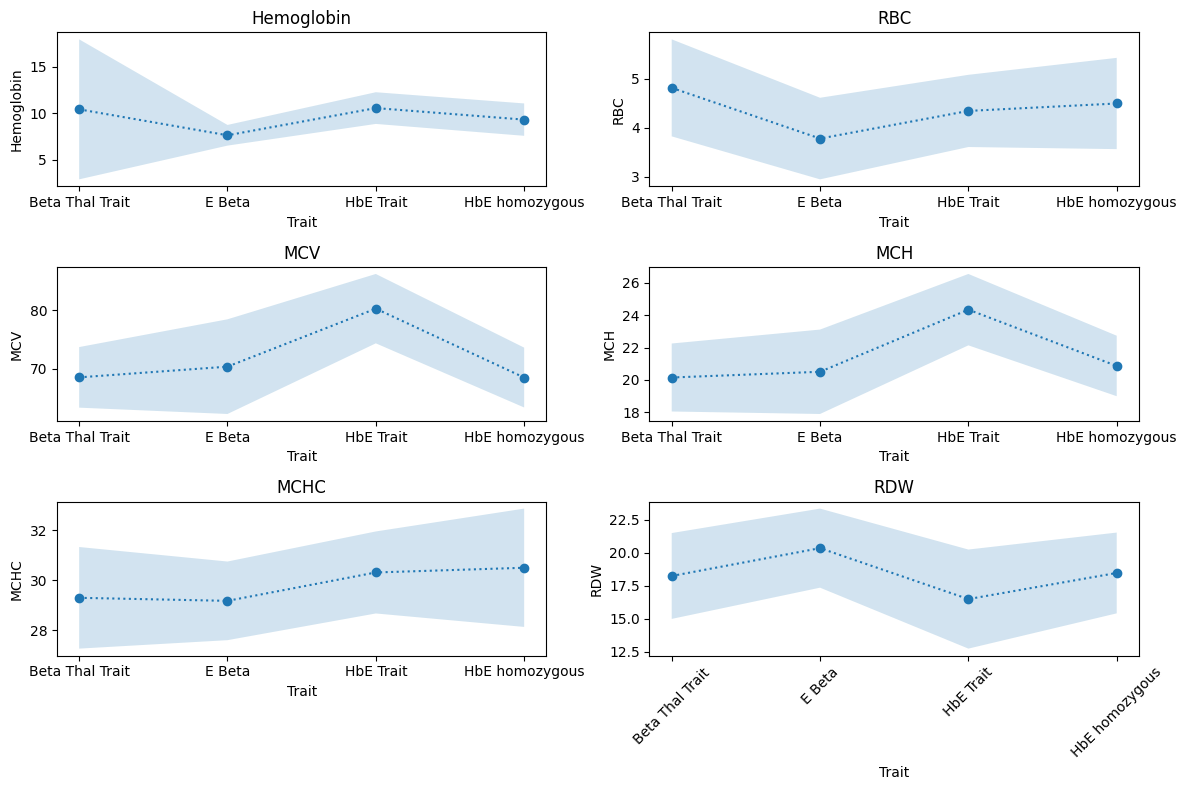

In [ ]:
# data visualization of the factors against traits
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, blood_index in enumerate(['Hemoglobin', 'RBC', 'MCV', 'MCH', 'MCHC', 'RDW']):
    axes[i // 2, i % 2].plot(df_mean.index, df_mean[blood_index], marker='o', linestyle='dotted')
    axes[i // 2, i % 2].fill_between(df_mean.index, df_mean[blood_index] - df_std[blood_index], df_mean[blood_index] + df_std[blood_index], alpha=0.2)
    axes[i // 2, i % 2].set_title(blood_index)
    axes[i // 2, i % 2].set_xlabel('Trait')
    axes[i // 2, i % 2].set_ylabel(blood_index)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Hemoglobin', ylabel='trait'>

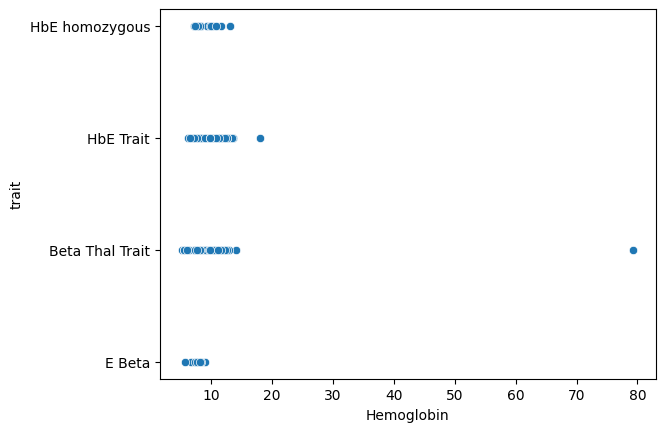

In [ ]:
sns.scatterplot(x=df['Hemoglobin'],y=df['trait'])

<Axes: xlabel='RBC', ylabel='trait'>

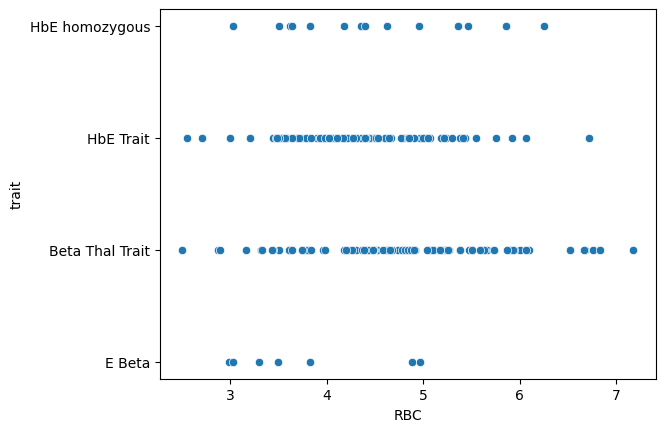

In [ ]:
sns.scatterplot(x=df['RBC'],y=df['trait'])

<Axes: xlabel='MCV', ylabel='trait'>

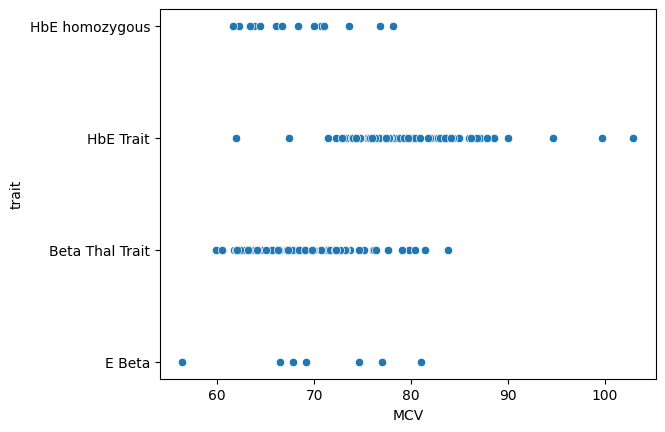

In [ ]:
sns.scatterplot(x=df['MCV'],y=df['trait'])

<Axes: xlabel='MCH', ylabel='trait'>

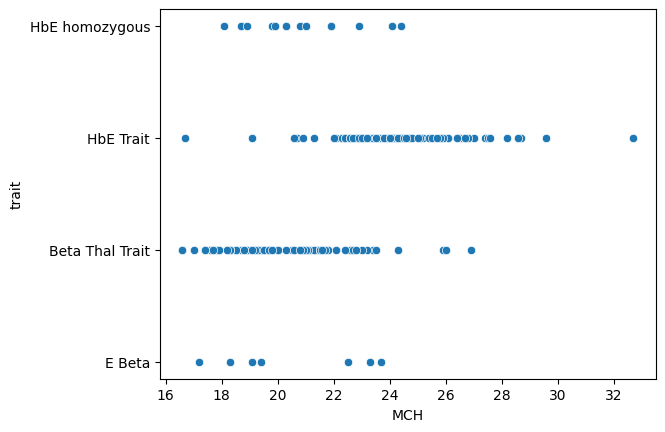

In [ ]:
sns.scatterplot(x=df['MCH'],y=df['trait'])

<Axes: xlabel='MCHC', ylabel='trait'>

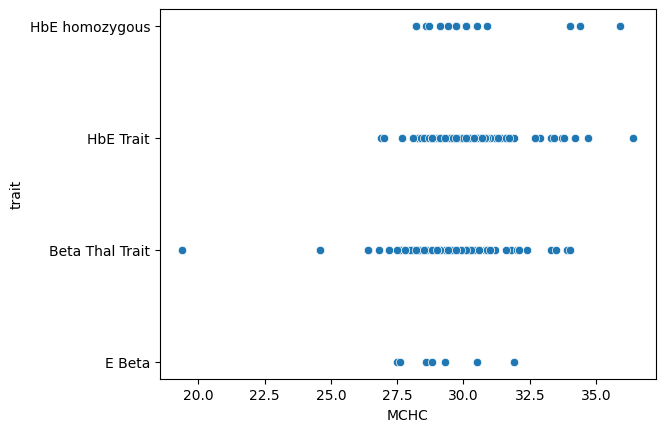

In [ ]:
sns.scatterplot(x=df['MCHC'],y=df['trait'])

<Axes: xlabel='RDW', ylabel='trait'>

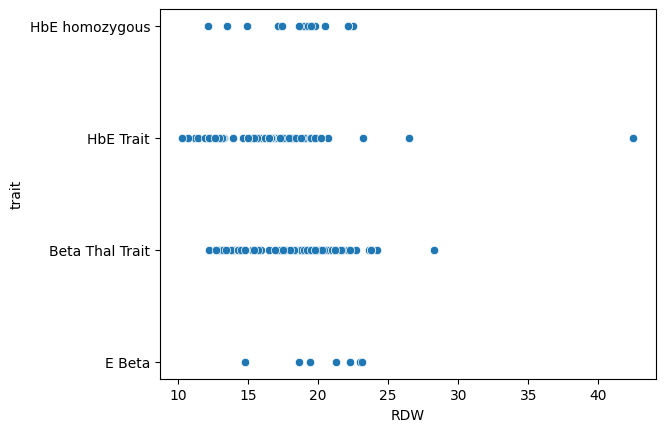

In [ ]:
sns.scatterplot(x=df['RDW'],y=df['trait'])

In [ ]:
from sklearn.metrics import accuracy_score

features = ['Hemoglobin', 'RBC', 'MCV', 'MCH', 'MCHC', 'RDW']
target = 'trait'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8048780487804879


Feature Ranking (F-value):
      feature      score
2         MCV  61.072451
3         MCH  48.820644
0  Hemoglobin   8.132734
1         RBC   6.207053
5         RDW   4.770885
4        MCHC   4.256407


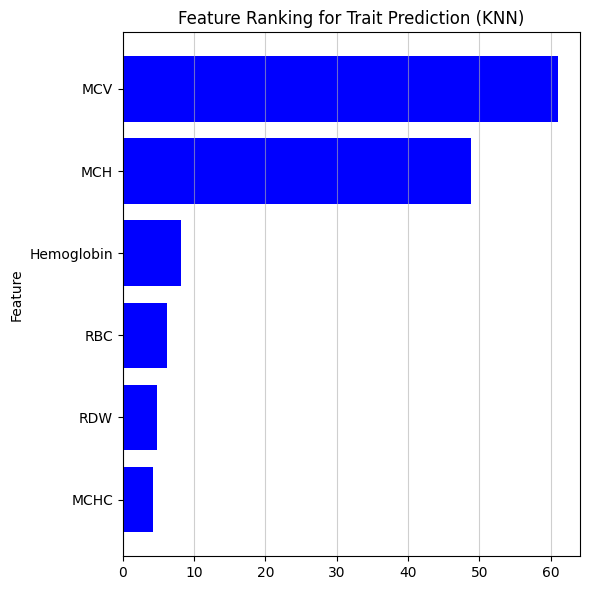

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

#feature selection using f_classif (ANOVA F-value)
selector = SelectKBest(f_classif, k=len(features))
selector.fit(X_train, y_train)
scores = selector.scores_

# Create a DataFrame to store feature names and scores
feature_scores = pd.DataFrame({'feature': features, 'score': scores})
feature_scores = feature_scores.sort_values(by='score', ascending=False)

# Print ranked features and scores
print("Feature Ranking (F-value):")
print(feature_scores)

plt.figure(figsize=(6, 6))
plt.barh(feature_scores['feature'], feature_scores['score'], color='blue')
plt.ylabel('Feature')
plt.title('Feature Ranking for Trait Prediction (KNN)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.grid(axis='x', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Beta Thal Trait       0.80      0.80      0.80        20
      HbE Trait       0.81      0.89      0.85        19
 HbE homozygous       0.00      0.00      0.00         2

       accuracy                           0.80        41
      macro avg       0.54      0.56      0.55        41
   weighted avg       0.77      0.80      0.78        41



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


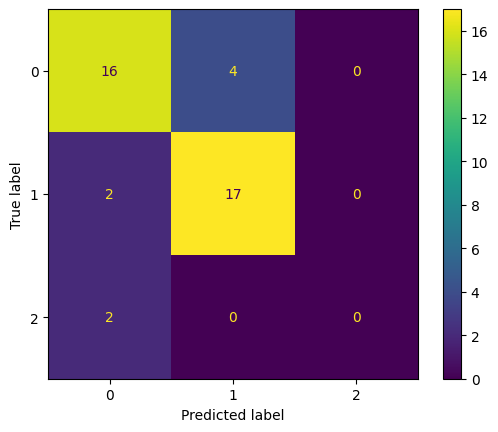

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# applying the random forest classifier on the dataset
features = ['Hemoglobin', 'RBC', 'MCV', 'MCH', 'MCHC', 'RDW']

target = df['trait']

X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score = accuracy_score(y_test, y_pred)

print('Accuracy score:', accuracy_score)

dominant_trait = rf.feature_importances_.argmax()

print('Dominant trait:', features[dominant_trait])

Accuracy score: 0.8292682926829268
Dominant trait: MCV


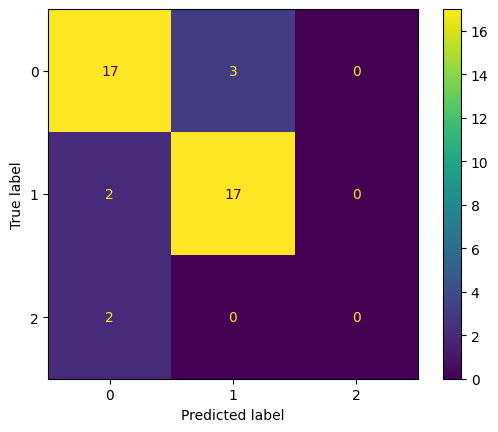

In [ ]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Feature Ranking (Random Forest Importance):
      feature  importance
2         MCV    0.308011
3         MCH    0.297909
5         RDW    0.124586
0  Hemoglobin    0.099050
1         RBC    0.096385
4        MCHC    0.074058


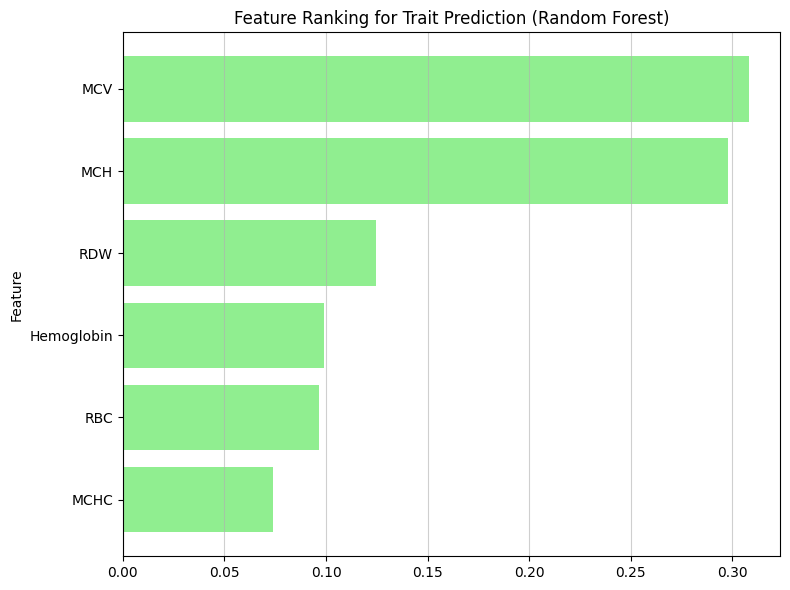

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, prefit=True)
feature_importances = rf.feature_importances_

feature_scores = pd.DataFrame({'feature': features, 'importance': feature_importances})
feature_scores = feature_scores.sort_values(by='importance', ascending=False)

print("Feature Ranking (Random Forest Importance):")
print(feature_scores)

plt.figure(figsize=(8, 6))
plt.barh(feature_scores['feature'], feature_scores['importance'], color='lightgreen')
plt.ylabel('Feature')
plt.title('Feature Ranking for Trait Prediction (Random Forest)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.6)
plt.tight_layout()
plt.show()

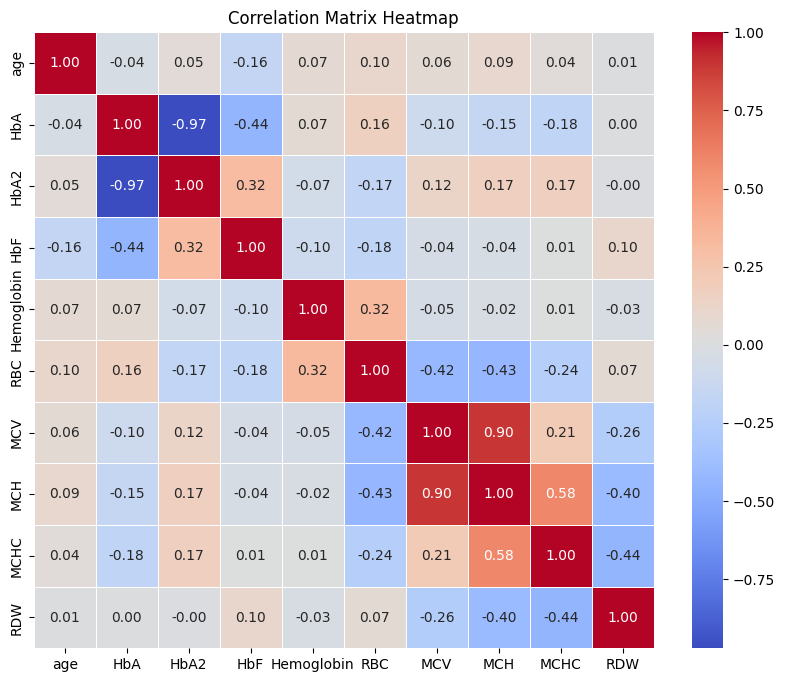

In [ ]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap')
plt.show()